<a href="https://colab.research.google.com/github/Mohith-11/Plant-disease-detection/blob/main/Week/plant_disease_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()       # choose  ➜  New Plant Diseases Dataset(Augmented).zip


Saving New Plant Diseases Dataset(Augmented).zip to New Plant Diseases Dataset(Augmented).zip


In [3]:
!rm -rf dataset
!unzip -q "New Plant Diseases Dataset(Augmented).zip" -d dataset


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/dataset/New Plant Diseases Dataset(Augmented)/train'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2   # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10479 images belonging to 7 classes.
Found 2617 images belonging to 7 classes.


In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_gen, validation_data=val_gen, epochs=15)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 75s 210ms/step - accuracy: 0.4630 - loss: 1.3718 - val_accuracy: 0.7933 - val_loss: 0.5354
Epoch 2/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 63s 194ms/step - accuracy: 0.7833 - loss: 0.5853 - val_accuracy: 0.8758 - val_loss: 0.3615
Epoch 3/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 64s 195ms/step - accuracy: 0.8775 - loss: 0.3652 - val_accuracy: 0.9385 - val_loss: 0.1870
Epoch 4/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 65s 199ms/step - accuracy: 0.9259 - loss: 0.2216 - val_accuracy: 0.9519 - val_loss: 0.1360
Epoch 5/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 65s 197ms/step - accuracy: 0.9358 - loss: 0.1872 - val_accuracy: 0.9415 - val_loss: 0.1582
Epoch 6/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 65s 197ms/step - accuracy: 0.9547 - loss: 0.1493 - val_accuracy: 0.9538 - val_loss: 0.1444
Epoch 7/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 65s 197ms/step - accuracy: 0.9513 - loss: 0.1405 - val_accuracy: 0.9557 - val_loss: 0.1266
Epoch 8/15
328/328 ━━━━━━━━━━━━━━━━━━━━ 64s 196ms/step - accuracy: 0.9612 - loss: 0

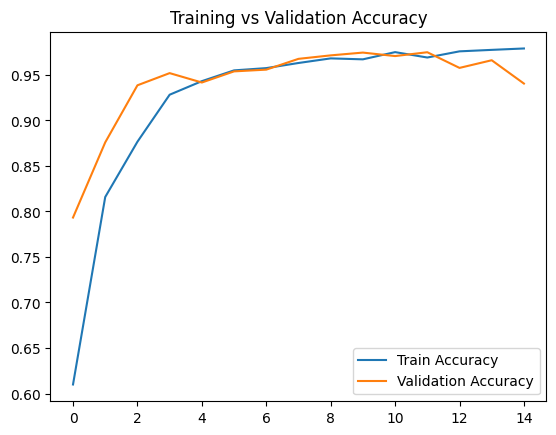

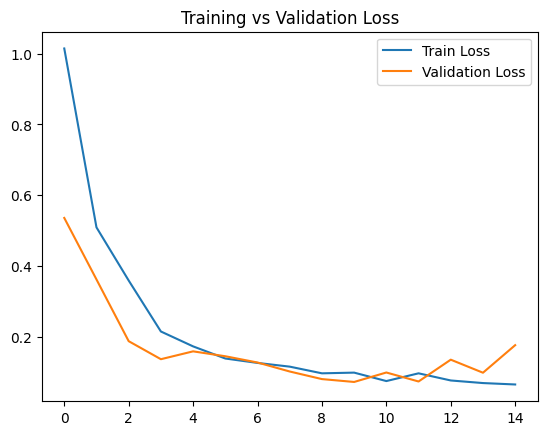

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [8]:
model.save('cnn_model_v1.h5')

from google.colab import files
files.download('cnn_model_v1.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>